Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

Extracting Unique Recipes for clustering:

In [2]:
df = pd.read_csv('Final_Processed_Dataset.csv')
unique_df = df.drop_duplicates(subset='RecipeId', keep='first').reset_index(drop=True)

TF-IDF Vectorization:

In [3]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(unique_df['RecipeIngredientParts'])

Fit the Nearest Neighbors model

In [4]:
k = 5
knn = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='cosine')
knn.fit(tfidf_matrix)

NearestNeighbors(metric='cosine')

Recommendation Function:

In [5]:
def get_recommendations(title, knn_model=knn, tfidf_model=tfidf_vectorizer, df=unique_df):
    title_tfidf = tfidf_model.transform([title])
    indices = knn_model.kneighbors(title_tfidf, return_distance=False)
    recommendations = df.iloc[indices[0]]['Name'].tolist()
    return recommendations

Printing Recommendations:

In [6]:
print(get_recommendations('Buttermilk Pie'))
print(get_recommendations('Potato Salad'))

['Fried Cornbread II', 'Easy Red Velvet Cake', 'Chocolate Dessert Crepes', 'Whole Wheat Buttermilk Rusks', 'Sunrise Cherry Pie']
['Potatoes Tapas in Garlic Mayonnaise (Potatoes Aioli)', 'Cold Picnic Potato Salad', 'Quick Baked Potato', 'Cheesy Hash Browns for One', 'Irish Fadge (Potato Cakes)']


Analysis of Results:

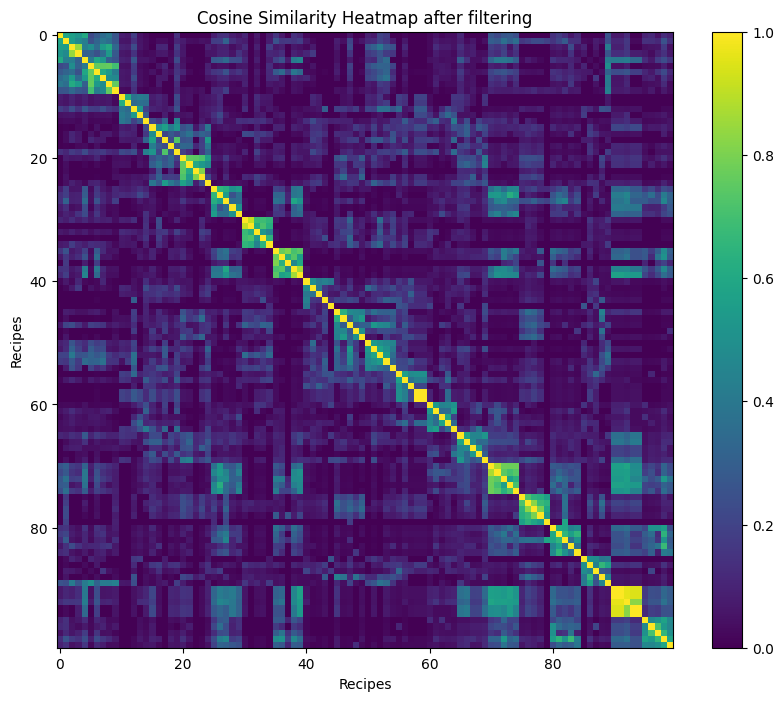

In [14]:
distances= knn.kneighbors(tfidf_matrix)[0][:20]
indices = knn.kneighbors(tfidf_matrix)[1][:20]
similar_recipes_df = unique_df.iloc[indices.flatten()]

similar_recipes_df = similar_recipes_df.reset_index(drop=True)

new_tfidf = TfidfVectorizer()
new_tfidf_matrix = new_tfidf.fit_transform(similar_recipes_df['RecipeIngredientParts'])
new_cosine_sim = linear_kernel(new_tfidf_matrix, new_tfidf_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(new_cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Cosine Similarity Heatmap after filtering')
plt.xlabel('Recipes')
plt.ylabel('Recipes')
plt.show()